## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/explain-machine-learning-models-partial-dependence-ce6b9923034f)) <font size='3ptx'><b>Making black box models a thing of the past</b></font>

<b>With all the complexity that comes with developing machine learning models, it comes as no surprise that some of these just don’t translate very well when being explained in plain English</b>. The model inputs go in, the answers come out and no one knows how exactly the model arrived at this conclusion. This can result in some sort of disconnect or lack of transparency between different members working on the same team. As the prevalence of machine learning has increased in recent years, this lack of explainability when using complex models has grown even more. <b>In this article, I’ll discuss a few ways to make your models more explainable to the average person whether they be your non-technical manager or just a curious friend</b>.

### <font color='darkgreen'>Why is explainability important?</font>
<font size='3ptx'><b>The responsibility that falls on machine learning models has only increased over time. </b></font>

They are responsible for everything from filtering spam in your email to deciding if you qualify for that new job or loan you’ve been looking for. <b>When these models can’t be explained in plain English, a lack of trust ensues and people become reluctant to use your model for any important decisions</b>.

It would be a shame if the model you worked so hard to create ended up not being discarded because no one could understand what it was doing. <b>In being able to explain a model and show insights that come from it, people</b> (<font color='brown'>especially those with no background in data science</font>) <b>will be a lot more likely to trust and use the models that you create</b>.

### <font color='darkgreen'>Interpreting Coefficients</font>
<b><font size='3ptx'>On one end of the spectrum, we have simple models like linear regression.</font></b>

Models like this are quite simple to explain, with each coefficient representing how much a feature affects our target. e.g.:
![linear model](images/1.PNG)

<br/>

The image above shows the plot for a model represented by the equation $y=2x$. This just means that for an increase of 1 in feature x, the target variable will increase by 2. You can have multiple features like this; each one with its own coefficient representing its effect on the target.

On the other end, we have “black box” models like neural networks where all we can see are the inputs and outputs but the meanings and steps taken to get from input to output are effectively blocked by a sea of incomprehensible numbers.

<a id='sect2'></a>
## <font color='darkblue'>Partial Dependence</font>
* <b><font size='3ptx'><a href='#sect2_1'>Loading dataset</a></font></b>
* <b><font size='3ptx'><a href='#sect2_2'>Train model</a></font></b>
* <b><font size='3ptx'><a href='#sect2_3'>Partial dependence plots</a></font></b>
* <b><font size='3ptx'><a href='#sect2_4'>How does it work?</a></font></b>
* <b><font size='3ptx'><a href='#sect2_5'>A Step Further</a></font></b>

<br/>

<font size='3ptx'><b>Partial dependence shows how a particular feature affects a prediction. </b></font>

<b>By making all other features constant, we want to find out how the feature in question influences our outcome</b>. This is similar to interpreting coefficients explained in the previous section but partial dependence allows us to generalize this interpretation to models more sophisticated and complex than simple linear regression.

As an example, we’ll be using a decision tree on this [**Cardiovascular Disease dataset on Kaggle**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). The library we’ll be using to plot partial dependence is [**pdpbox**](https://github.com/SauceCat/PDPbox). Let’s train the model and see how this all works.

In [25]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree

<a id='sect2_1'></a>
### <font color='darkgreen'>Loading dataset</font>

In [7]:
csv_data_file_path = '../../datas/kaggle_cardiovascular_disease_dataset/cardio_train.csv'
raw_df = pd.read_csv(csv_data_file_path, sep=';')
print(raw_df.shape)
raw_df.sample(n=3)

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
58721,83800,18909,1,165,68.0,120,80,1,1,0,0,1,1
26397,37715,19168,1,157,58.0,100,70,2,2,0,0,1,0
2542,3595,18323,2,178,90.0,120,80,2,2,0,0,1,1


<a id='sect2_2'></a>
### <font color='darkgreen'>Train model</font>

In [8]:
# Split the data into train and test sets
features = raw_df.drop('cardio', axis=1)
target = raw_df['cardio']
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [9]:
# Fit a decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<a id='sect2_3'></a>
### <font color='darkgreen'>Partial dependence plots</font>
The [**sklearn.inspection**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) module provides a convenience function [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) to create one-way and two-way partial dependence plots. 

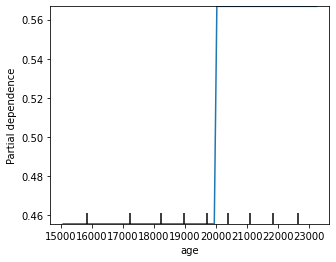

In [23]:
plt.rcParams['figure.figsize'] = [5, 4]
PartialDependenceDisplay.from_estimator(clf, X_train, features[['age']])
plt.ylabel("Change in prediction")

The plot above shows the partial dependence plot for the feature `age`. The target variable we are trying to predict is the presence of cardiovascular disease. We can see that as the age feature goes above 19000 days (<font color='brown'>around 52 years</font>), it starts to affect the prediction in a positive way (<font color='brown'>a higher age translates to a higher probability of cardiovascular disease</font>). When thinking about this insight intuitively, the model makes sense and we are more likely to trust its predictions.

The decision tree we are using is still relatively simple and its partial dependency plot may not paint the whole picture. Let’s try again, this time with a random forest model.

In [39]:
X_small = X_train[:1000]
y_small = y_train[:1000]

In [40]:
# Fit a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_small[:1000], y_small)

RandomForestClassifier(random_state=42)

Text(0, 0.5, 'Change in prediction')

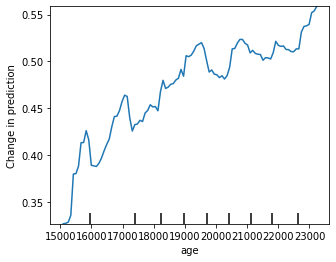

In [41]:
PartialDependenceDisplay.from_estimator(rf, X_small, features[['age']])
plt.ylabel("Change in prediction")

Using a more complex model like random forest, we see that the `age` feature affects our predictions more linearly as opposed to the ‘step-like’ prediction effect we saw when we used a simpler decision tree.

<a id='sect2_4'></a>
### <font color='darkgreen'>How does it work?</font>
Partial dependence plots rely on a model that has been fit on the data we are working with. Let’s take a single row of our dataset as an example.

In [29]:
raw_df[['age']].describe()

,age
count,70000.000000
mean,19468.865814
std,2467.251667
min,10798.000000
25%,17664.000000
50%,19703.000000
75%,21327.000000
max,23713.000000


The model will predict the probability of cardiovascular disease from the given data. We will actually do this multiple times, changing the value of the variable `age` every time we make a prediction. What is the probability of cardiovascular disease when age is 12000? 16000? 20000? We <b>keep track of these predictions and see how changing this variable affects the prediction. In the end, we do this for several rows and take the average prediction for different values of `age`. We then plot these out and come up with the partial dependency plot seen above.</b>

<a id='sect2_5'></a>
### <font color='darkgreen'>A Step Further</font>
<b><font size='3ptx'>Now that we’ve seen how partial dependence works with a single variable, let’s look at how it works with feature interactions! Let’s say we wanted to see how height and weight interacted to affect our predictions.</font></b>

We can also use a partial dependency plot to see this interaction. We’ll use the same random forest model seen in the previous section. By changing our code a little bit, we’ll be able to come up with an entirely different-looking plot that helps us see feature interactions.

In [31]:
from sklearn.inspection import plot_partial_dependence

/usr/local/google/home/johnkclee/Github/ml_articles/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


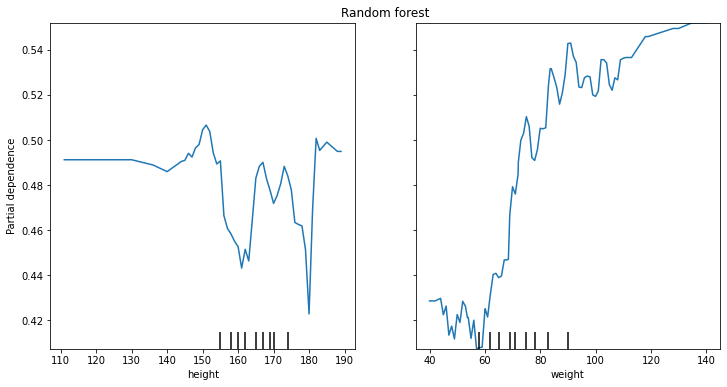

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random forest")
plot_partial_dependence(rf, X_small, ["height", "weight"], ax=ax)

/usr/local/google/home/johnkclee/Github/ml_articles/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


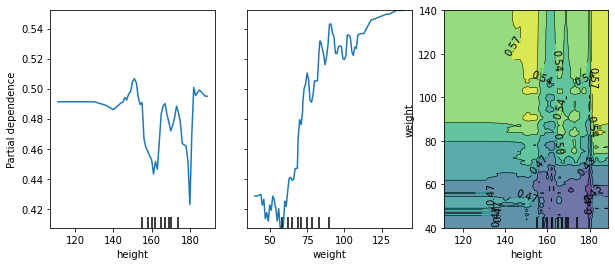

In [47]:
plt.rcParams['figure.figsize'] = [10, 4]
plot_partial_dependence(rf, X_small, [3, 4, (3, 4)])  

<b>This plot not only looks pretty, but it also gives us a lot of information about how `height` and `weight` interact to affect our predictions</b>. <b>The variable `height` has less of an effect since the color of the plot does not change much as we move across the x-axis. `weight` seems to have a much stronger effect on the probability of cardiovascular disease as the predictions are positively affected as we move up the y axis</b>. Once again, thinking intuitively this makes sense. A person with a higher weight would be more likely to have cardiovascular disease. With this insight from our model, we are that much more inclined to trust its predictions. We can do this with any two features we want to be able to answer different hypotheses we might have about our data.

## <font color='darkblue'>Supplement</font>
* [Sklearn - Partial Dependence and Individual Conditional Expectation plots](https://scikit-learn.org/stable/modules/partial_dependence.html)
* [Sklearn - Advanced Plotting With Partial Dependence](https://scikit-learn.ru/example/advanced-plotting-with-partial-dependence/)
* [Partial Dependence Plots 從原理到實戰](https://tw.pythontechworld.com/article/detail/5TWurubfLXb0)